In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Customers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## missing values

In [3]:
df['Administrative_Duration'].replace(0, np.nan, inplace=True)
df['Administrative_Duration'] = df['Administrative_Duration'].fillna(df['Administrative_Duration'].median())

df['Informational_Duration'].replace(0, np.nan, inplace=True)
df['Informational_Duration'] = df['Informational_Duration'].fillna(df['Informational_Duration'].median())

df['ProductRelated_Duration'].replace(0, np.nan, inplace=True)
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].median())
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,88.0,0,76.0,1,671.625000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,88.0,0,76.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,88.0,0,76.0,1,671.625000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,88.0,0,76.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,88.0,0,76.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df['Month'] = df['Month'].astype('category')

df['VisitorType'] = df['VisitorType'].astype('category')
df['VisitorType'] = df['VisitorType'].cat.codes

df['Weekend'] = df['Weekend'].astype('category')
df['Weekend'] = df['Weekend'].cat.codes

df['Revenue'] = df['Revenue'].astype('category')
df['Revenue'] = df['Revenue'].cat.codes
df['Month'] = df['Month'].cat.codes


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Imbalanced Dataset

Text(0.5, 1.0, 'Revenue')

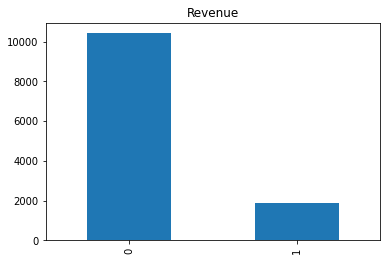

In [6]:
labels_count = df['Revenue'].value_counts()
labels_count.plot(kind='bar')
plt.title('Revenue')

## Feature Engineering

Text(0.5, 0.85, '95% cut-off threshold')

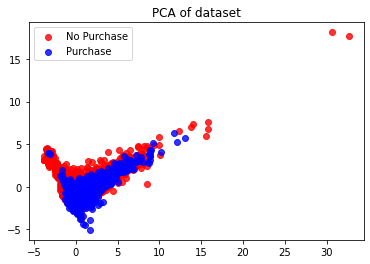

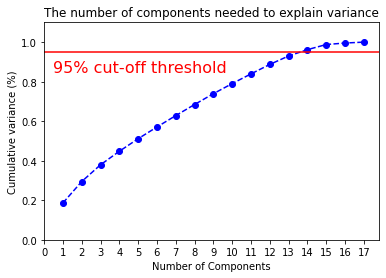

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X_scaled = StandardScaler().fit_transform(X_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
colors = ['r', 'b']
target_names = ['No Purchase', 'Purchase']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], color=color, alpha=.8,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

pca = PCA(random_state=42)
pca.fit(StandardScaler().fit_transform(X_train))

xi = np.arange(1, len(X_train.columns)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(X_train.columns)+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)


Text(0.5, 1.0, 'Feature Importance')

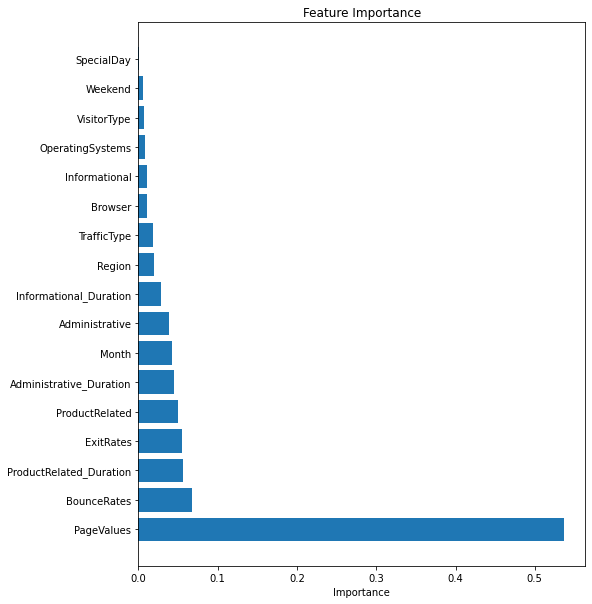

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

rf.fit(X_train, y_train)

importances = rf.feature_importances_

most_important_features = sorted(zip(importances, X.columns), reverse=True)
plt.figure(figsize=(8, 10))
feature_importance = pd.DataFrame(most_important_features, columns=['Importance', 'Feature'])
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')


In [18]:
most_important_features = [x[1] for x in most_important_features[:9]]

## Models

In [11]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

clf1 = SVC(probability=True, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()
clf4 = MLPClassifier(random_state=42, max_iter=3000)
clf5 = LogisticRegression(random_state=42)

models = {'SVC': clf1, 'Decision Tree': clf2, 'KNN': clf3, 'MLP': clf4, 'Logistic Regression': clf5}

params = {'SVC': {'kernel': ['rbf'], 'C': [1]},
            'Decision Tree': {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
            'KNN': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
            'MLP': {'hidden_layer_sizes': [(100,), (50,), (25,), (10,), (5,), (1,)]},
            'Logistic Regression': {'C': [0.1, 1, 10, 100, 1000]}}

In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

scoring = {'accuracy': 'accuracy',
            'precision': 'precision',
            'roc_auc': 'roc_auc',
            'f1': 'f1'}


def find_models_scores(X_train, preprocessing_steps=[('scaler', StandardScaler())], oversampling=False):
    models_scores = {}

    for model_name, model in models.items():
        if oversampling:
            pipeline = ImbPipeline(steps=preprocessing_steps + [('oversampling', SMOTE()), ('clf', model)])

        else:
            pipeline = Pipeline(steps=preprocessing_steps + [('clf', model)])

        param_grid = {'clf__' + k: v for k, v in params[model_name].items()}
    
        grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
        
        grid_search.fit(X_train, y_train)

        print(f'Best parameters for {model_name}: ', grid_search.best_params_)

        best_model = grid_search.best_estimator_
        
        pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('clf', best_model)])

        scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

        models_scores[model_name] = {s:scores[f'test_{s}'].mean() for s in scoring}


    return models_scores

models_scores = find_models_scores(X_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for SVC:  {'clf__C': 1, 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree:  {'clf__max_depth': 4}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN:  {'clf__n_neighbors': 9}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for MLP:  {'clf__hidden_layer_sizes': (10,)}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression:  {'clf__C': 100}


<Figure size 432x288 with 0 Axes>

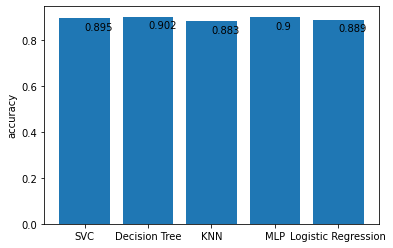

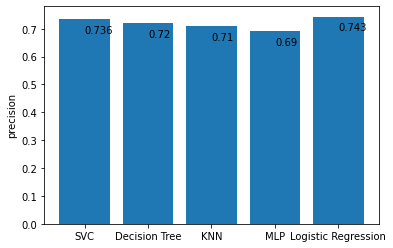

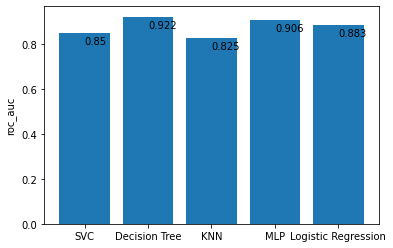

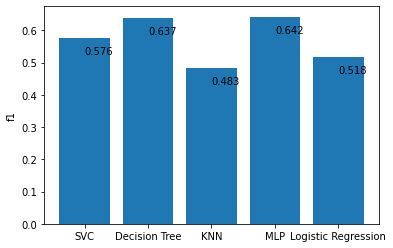

In [14]:
def show_scoring(models_scores, scoring=['accuracy', 'precision', 'roc_auc', 'f1'], label=''):
    for score in scoring:

        if len(scoring) > 1:
            plt.figure()
        metric = [model_score[score] for model_score in models_scores.values()]
        plt.bar(models_scores.keys(), metric, label=label)
        plt.ylabel(score)
        # add value on top of each bar
        for i, v in enumerate(metric):
            plt.text(i, v-0.05, str(round(v, 3)))
plt.figure()
show_scoring(models_scores)

## Adding PCA to models

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for SVC:  {'clf__C': 1, 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree:  {'clf__max_depth': 6}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN:  {'clf__n_neighbors': 10}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for MLP:  {'clf__hidden_layer_sizes': (50,)}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression:  {'clf__C': 1}


Text(0.5, 1.0, 'f1 of models  with PCA')

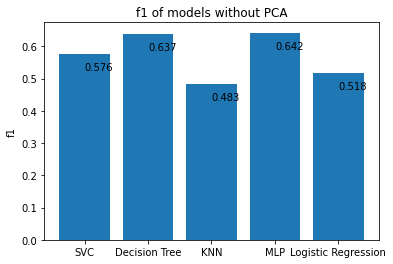

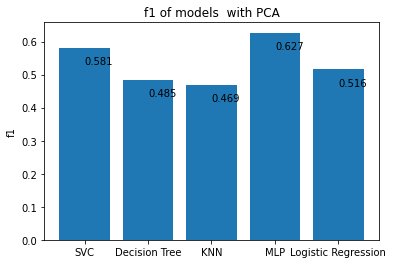

In [15]:
preprocessing_steps = [('scaler', StandardScaler()), ('pca', PCA(n_components=13))]

models_scores_with_pca = find_models_scores(X_train, preprocessing_steps)

show_scoring(models_scores=models_scores, scoring=['f1'], label='Without PCA')
plt.title('f1 of models without PCA')
plt.figure()
show_scoring(models_scores=models_scores_with_pca, scoring=['f1'], label='With PCA')
plt.title('f1 of models  with PCA')


## Most importatnt features for Models

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for SVC:  {'clf__C': 1, 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree:  {'clf__max_depth': 4}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN:  {'clf__n_neighbors': 10}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for MLP:  {'clf__hidden_layer_sizes': (5,)}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression:  {'clf__C': 1}


Text(0.5, 1.0, 'f1 of models with most important features')

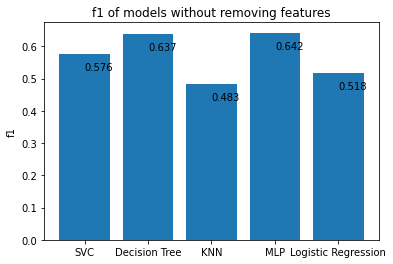

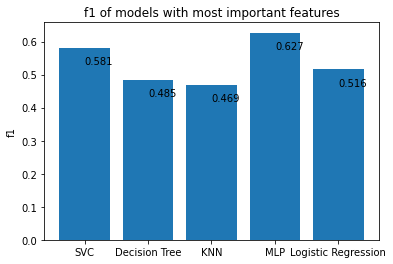

In [20]:
X_train_most_important = X_train[most_important_features]

models_scores_with_important_features = find_models_scores(X_train_most_important)

show_scoring(models_scores=models_scores, scoring=['f1'], label='Without removing features')
plt.title('f1 of models without removing features')
plt.figure()
show_scoring(models_scores=models_scores_with_pca, scoring=['f1'], label='With most important features')
plt.title('f1 of models with most important features')


## Oversampling Data

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for SVC:  {'clf__C': 1, 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree:  {'clf__max_depth': 10}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN:  {'clf__n_neighbors': 2}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for MLP:  {'clf__hidden_layer_sizes': (1,)}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression:  {'clf__C': 1}


Text(0.5, 1.0, 'Accuracy of models with smote')

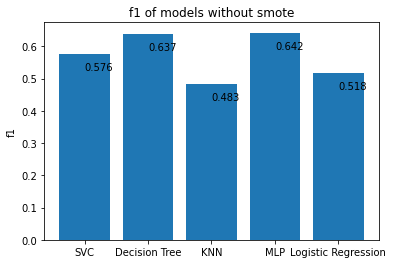

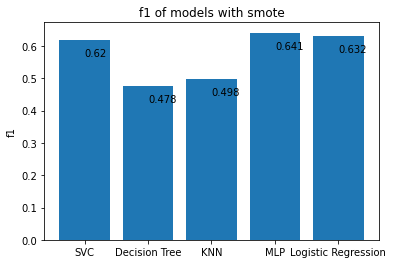

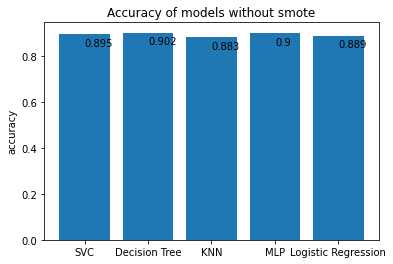

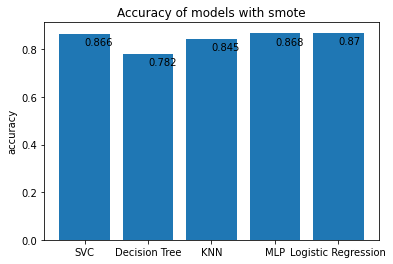

In [21]:
from imblearn.over_sampling import SMOTE

models_with_smote_data = find_models_scores(X_train, preprocessing_steps, oversampling=True)

show_scoring(models_scores=models_scores, scoring=['f1'])
plt.title('f1 of models without smote')
plt.figure()
show_scoring(models_scores=models_with_smote_data, scoring=['f1'])
plt.title('f1 of models with smote')

plt.figure()
show_scoring(models_scores=models_scores, scoring=['accuracy'])
plt.title('Accuracy of models without smote')
plt.figure()
show_scoring(models_scores=models_with_smote_data, scoring=['accuracy'])
plt.title('Accuracy of models with smote')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for SVC:  {'clf__C': 1, 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree:  {'clf__max_depth': 10}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN:  {'clf__n_neighbors': 2}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for MLP:  {'clf__hidden_layer_sizes': (1,)}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression:  {'clf__C': 10}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Random Forest:  {'clf__max_depth': 15, 'clf__n_estimators': 100}


Text(0.5, 1.0, 'f1 of Random Forest and others')

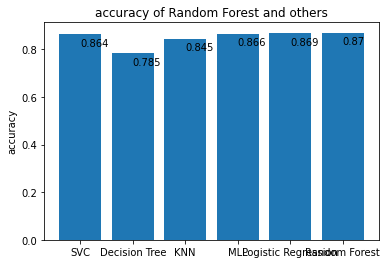

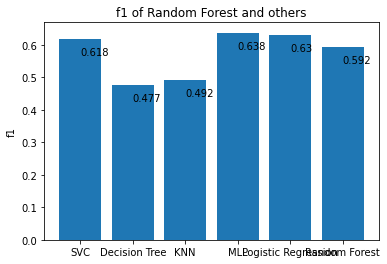

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_param = {'n_estimators': [10, 100], 'max_depth': [5, 10, 15]}

models['Random Forest'] = rf
params['Random Forest'] = rf_param

new_models_scores = find_models_scores(X_train, preprocessing_steps, oversampling=True)

show_scoring(models_scores=new_models_scores, scoring=['accuracy'])
plt.title('accuracy of Random Forest and others')

plt.figure()
show_scoring(models_scores=new_models_scores, scoring=['f1'])
plt.title('f1 of Random Forest and others')


## Test Best model on best model and report metrics

Accuracy: 0.8694241686942417
F1 score: 0.6707566462167689
Precision: 0.5784832451499118
ROC AUC: 0.840875912408759


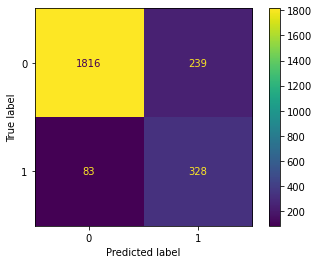

In [38]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score

mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(5,))

over = SMOTE()
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_smote, y_train_smote = over.fit_resample(X_train_scaled, y_train)

mlp.fit(X_train_smote, y_train_smote)


plot_confusion_matrix(mlp, X_test_scaled, y_test) 

print(f'Accuracy: {accuracy_score(y_test, mlp.predict(X_test_scaled))}')
print(f'F1 score: {f1_score(y_test, mlp.predict(X_test_scaled))}')
print(f'Precision: {precision_score(y_test, mlp.predict(X_test_scaled))}')
print(f'ROC AUC: {roc_auc_score(y_test, mlp.predict(X_test_scaled))}')